In [1]:
import xmltodict


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import helper
import dataloader

This function performs cleaning of the column and index names of a pandas DataFrame.

The function takes the input DataFrame and uses a helper function '_cleanlabel' to clean the names of the columns and the index.
If the index name exists, the index name is renamed using the '_cleanlabel' function and the updated DataFrame is returned.

In [2]:
def labelcleaner(df):
    """
    Input:
    df: pandas DataFrame

    Output:
    df: pandas DataFrame with cleaned column and index names
    """
    df.columns = [
        helper._cleanlabel(col) for col in df.columns
    ]
    if df.index.name:
        df.index.rename(
            helper._cleanlabel(df.index.name),
            inplace=True
        )
    return df

In [3]:
health_datapath = '/Users/ganesh/Library/Mobile Documents/com~apple~CloudDocs/SharedFolder/export.xml'
sleep_datapath = '/Users/ganesh/Library/Mobile Documents/com~apple~CloudDocs/SharedFolder/AutoSleep.csv'

The code opens an XML file located at the health_datapath location in the 'r' (read) mode and ignores any errors that might occur during the reading process.

Next, the xmltodict library is used to parse the contents of the file into a Python dictionary, which is stored in the health variable. The health dictionary has two keys: 'HealthData' and 'Record' for health records and 'HealthData' and 'Workout' for workout records.

Two new dataframes are created, healthdata and workoutdata, from the healthrecords and workoutrecords respectively, using the pd.DataFrame method. Finally, a third dataframe, sleepdata, is created by reading a CSV file located at the sleep_datapath location using the pd.read_csv method.

In [4]:
with open(health_datapath, 'r', errors='ignore') as xml_file:
    health = xmltodict.parse(xml_file.read())
    
    healthrecords = health['HealthData']['Record']
    workoutrecords = health['HealthData']['Workout']
    
    
    healthdata = pd.DataFrame(healthrecords)
    workoutdata = pd.DataFrame(workoutrecords)
    sleepdata = pd.read_csv(sleep_datapath)

Let's put them into dataframes if we need to have a look at the raw data later.

In [7]:
health_rawsample = healthdata.sample(1000)
workout_rawsample = workoutdata.copy()
sleep_rawsample = sleepdata.copy()

In [8]:
health_rawsample.info()
workout_rawsample.info()
sleep_rawsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 156407 to 64723
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   @type                             1000 non-null   object
 1   @sourceName                       1000 non-null   object
 2   @sourceVersion                    1000 non-null   object
 3   @unit                             989 non-null    object
 4   @creationDate                     1000 non-null   object
 5   @startDate                        1000 non-null   object
 6   @endDate                          1000 non-null   object
 7   @value                            1000 non-null   object
 8   @device                           968 non-null    object
 9   MetadataEntry                     146 non-null    object
 10  HeartRateVariabilityMetadataList  2 non-null      object
dtypes: object(11)
memory usage: 93.8+ KB
<class 'pandas.core.frame.DataFrame'>
R

This code calls the "labelcleaner" function on the three dataframes: "healthdata", "workoutdata", and "sleepdata". The purpose of the "labelcleaner" function is to clean the labels of the columns and index of a dataframe. The cleaned labels are assigned back to the respective dataframes.

In [9]:
healthdata = labelcleaner(healthdata)
workoutdata = labelcleaner(workoutdata)
sleepdata = labelcleaner(sleepdata)

In [10]:
healthdata.columns

Index(['type', 'sourcename', 'sourceversion', 'unit', 'creationdate',
       'startdate', 'enddate', 'value', 'device', 'metadataentry',
       'heartratevariabilitymetadatalist'],
      dtype='object')

In [11]:
workoutdata.columns

Index(['workoutactivitytype', 'duration', 'durationunit', 'totaldistance',
       'totaldistanceunit', 'totalenergyburned', 'totalenergyburnedunit',
       'sourcename', 'sourceversion', 'device', 'creationdate', 'startdate',
       'enddate', 'metadataentry', 'workoutevent', 'workoutroute'],
      dtype='object')

In [12]:
sleepdata.columns

Index(['iso8601', 'fromdate', 'todate', 'bedtime', 'waketime', 'inbed',
       'awake', 'fellasleepin', 'sessions', 'asleep', 'asleepavg7',
       'efficiency', 'efficiencyavg7', 'quality', 'qualityavg7', 'deep',
       'deepavg7', 'sleepbpm', 'sleepbpmavg7', 'daybpm', 'daybpmavg7',
       'wakingbpm', 'wakingbpmavg7', 'hrv', 'hrvavg7', 'sleephrv',
       'sleephrvavg7', 'spo2avg', 'spo2min', 'spo2max', 'respavg', 'respmin',
       'respmax', 'tags', 'notes'],
      dtype='object')

The cleansehealthdata function takes in a DataFrame df and performs the following operations:

Drops columns with more than 25% missing values using dropna function with thresh parameter.
Renames the column 'type' to 'datatype'.
Converts the creationdate, startdate, and enddate columns to datetime format and removes timezone information using pd.to_datetime and dt.tz_convert.
Replaces the string 'HKQuantityTypeIdentifier' in the datatype column using str.replace.
Replaces missing values in the device column with the string 'No device'.
Removes rows where the value column is equal to 'HKCategoryValueSleepAnalysisInBed'.
Removes rows where datatype is not one of the listed values.
Drops any remaining missing values.
Converts datatype to a categorical variable, sourcename to a categorical variable, and value to a float.


The cleanseworkoutdata function takes in a DataFrame df and performs the following operations:

Drops columns with more than 25% missing values using dropna function with thresh parameter.
Drops the sourceversion column if it exists in the DataFrame.
Renames the column 'workoutactivitytype' to 'workouttype' and 'metadataentry' to 'workoutname'.
Replaces the string 'HKWorkoutActivityType' in the workouttype column using str.replace.
Extracts the '@value' key from the workoutname column and replaces missing values with 'unknown'.
Converts the creationdate, startdate, and enddate columns to datetime format and removes timezone information using pd.to_datetime and dt.tz_convert.
Replaces missing values in the device column with the string 'No device'.
Converts workouttype to a categorical variable, sourcename to a categorical variable, and workoutname to a categorical variable.
Converts duration, totaldistance, and totalenergyburned to a float.
Drops any remaining missing values.


The cleansesleepdata function takes in a dataframe df as input and performs the following operations on it:

Drops several columns specified by name:

'asleepavg7', 'efficiencyavg7', 'qualityavg7', 'deepavg7', 'sleepbpmavg7', 'daybpmavg7','wakingbpmavg7', 'hrvavg7', 'sleephrvavg7', 'spo2avg', 'spo2min', 'spo2max', 'tags', 'notes'
The argument 'axis = 1' specifies that we are dropping columns, not rows.
The argument 'errors='ignore'' specifies that if any of the specified columns don't exist in the dataframe, the operation should be ignored and not raise an error.
Drops any columns that have more than 1/4 of their values missing (NaN).

The argument 'thresh = df.shape[0]//4' specifies that the number of non-NaN values must be greater than the number of rows divided by 4.
The argument 'axis=1' specifies that we are dropping columns, not rows.
Renames the 'iso8601' column to 'maindate'.

Converts several columns to the following data types using the pd.to_datetime and pd.to_timedelta functions:

'maindate': converted to a datetime data type and normalized (i.e. time information is removed)
'fromdate', 'todate', 'bedtime', 'waketime': converted to a datetime data type
'inbed', 'awake', 'fellasleepin', 'asleep', 'quality', 'deep': converted to a timedelta data type
The modified dataframe is then returned as the output.

In [13]:
## Apple health data cleaner
## @helper.cleanlabel
def cleansehealthdata(df):
    return (df
     .dropna(thresh = df.shape[0]//4, axis=1)
     .rename(columns ={'type': 'datatype'})
     .assign(creationdate = lambda x: pd.to_datetime(x['creationdate']).dt.tz_convert(None),
             startdate = lambda x: pd.to_datetime(x['startdate']).dt.tz_convert(None),
             enddate = lambda x: pd.to_datetime(x['enddate']).dt.tz_convert(None),
             datatype = lambda x: x['datatype'].str.replace('HKQuantityTypeIdentifier', ''),
             device = lambda x: x['device'].fillna('No device'))
     .query("value != 'HKCategoryValueSleepAnalysisInBed'")
     .query("datatype in ['BodyMassIndex', 'Height', 'BodyMass', 'HeartRate', \
                        'RespiratoryRate', 'BodyFatPercentage', 'LeanBodyMass',\
                        'StepCount', 'DistanceWalkingRunning', 'BasalEnergyBurned',\
                        'ActiveEnergyBurned', 'FlightsClimbed',\
                        'AppleExerciseTime', 'RestingHeartRate', 'VO2Max',\
                        'WalkingHeartRateAverage', 'EnvironmentalAudioExposure',\
                        'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',\
                        'SixMinuteWalkTestDistance', 'AppleStandTime', 'WalkingSpeed',\
                        'WalkingStepLength', 'WalkingAsymmetryPercentage',\
                        'HKDataTypeSleepDurationGoal', 'AppleWalkingSteadiness',\
                        'HeartRateVariabilitySDNN'] ")
     .dropna()
     .astype({'datatype':'category', 'sourcename':'category','value':'float'})
     )


## Heart watch workout data cleaner
## @helper.cleanlabel
def cleanseworkoutdata(df):
    return (
        df
        .dropna(thresh = df.shape[0]//4, axis=1)
        .drop(['sourceversion'],
            axis = 1, errors='ignore')
        .rename(columns = {'workoutactivitytype': 'workouttype', 'metadataentry':'workoutname'})
        .assign(
            workouttype = lambda x: x['workouttype'].str.replace('HKWorkoutActivityType', ''),
            workoutname = lambda x: x['workoutname'].apply(lambda x: x.get('@value')if isinstance(x, dict) else 'unknown'),
            creationdate = lambda x: pd.to_datetime(x['creationdate']).dt.tz_convert(None),
            startdate = lambda x: pd.to_datetime(x['startdate']).dt.tz_convert(None),
            enddate = lambda x: pd.to_datetime(x['enddate']).dt.tz_convert(None),
            device = lambda x: x['device'].fillna('No device')
            )
        .astype({'workouttype':'category', 'sourcename':'category', 'workoutname': 'category'})
        .astype({'duration':'float', 'totaldistance':'float', 'totalenergyburned': 'float'})
        .dropna()
        )


## Heart watch workout data cleaner
## @helper.cleanlabel
def cleansesleepdata(df):
    return (
      df.drop(['asleepavg7','efficiencyavg7','qualityavg7', 'deepavg7', 
            'sleepbpmavg7',  'daybpmavg7','wakingbpmavg7', 'hrvavg7',
            'sleephrvavg7', 'spo2avg', 'spo2min', 'spo2max', 'tags', 'notes'],
            axis = 1, errors='ignore')
        .dropna(thresh = df.shape[0]//4, axis=1)
        .rename(columns ={'iso8601': 'maindate'})
        .assign(maindate = lambda x: pd.to_datetime(x['maindate'])
                                        .dt.tz_convert(None).dt.normalize(),
                fromdate = lambda x: pd.to_datetime(x['fromdate']),
                todate = lambda x: pd.to_datetime(x['todate']),
                bedtime = lambda x: pd.to_datetime(x['bedtime']),
                waketime = lambda x: pd.to_datetime(x['waketime']),
                inbed= lambda x: pd.to_timedelta(x['inbed']),
                awake= lambda x: pd.to_timedelta(x['awake']),
                fellasleepin= lambda x: pd.to_timedelta(x['fellasleepin']),
                asleep= lambda x: pd.to_timedelta(x['asleep']),
                quality= lambda x: pd.to_timedelta(x['quality']),
                deep= lambda x: pd.to_timedelta(x['deep']),
                )
    )
    #return df

The code calls three functions - cleansehealthdata, cleanseworkoutdata, and cleansesleepdata - with the healthdata, workoutdata, and sleepdata dataframes, respectively.

The results of these function calls are stored in healthdata, workoutdata, and sleepdata variables, respectively, which means the original dataframes are being overwritten with the results of these cleaning and transformation operations.

In [14]:
healthdata = cleansehealthdata(healthdata)
workoutdata = cleanseworkoutdata(workoutdata)
sleepdata = cleansesleepdata(sleepdata)

In [15]:
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973928 entries, 0 to 986936
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   datatype       973928 non-null  category      
 1   sourcename     973928 non-null  category      
 2   sourceversion  973928 non-null  object        
 3   unit           973928 non-null  object        
 4   creationdate   973928 non-null  datetime64[ns]
 5   startdate      973928 non-null  datetime64[ns]
 6   enddate        973928 non-null  datetime64[ns]
 7   value          973928 non-null  float64       
 8   device         973928 non-null  object        
dtypes: category(2), datetime64[ns](3), float64(1), object(3)
memory usage: 61.3+ MB


In [16]:
sleepdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   maindate      333 non-null    datetime64[ns] 
 1   fromdate      333 non-null    datetime64[ns] 
 2   todate        333 non-null    datetime64[ns] 
 3   bedtime       333 non-null    datetime64[ns] 
 4   waketime      333 non-null    datetime64[ns] 
 5   inbed         333 non-null    timedelta64[ns]
 6   awake         333 non-null    timedelta64[ns]
 7   fellasleepin  331 non-null    timedelta64[ns]
 8   sessions      333 non-null    int64          
 9   asleep        333 non-null    timedelta64[ns]
 10  efficiency    333 non-null    float64        
 11  quality       331 non-null    timedelta64[ns]
 12  deep          282 non-null    timedelta64[ns]
 13  sleepbpm      331 non-null    float64        
 14  daybpm        329 non-null    float64        
 15  wakingbpm     333 non-n

In [17]:
workoutdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   workouttype            362 non-null    category      
 1   duration               362 non-null    float64       
 2   durationunit           362 non-null    object        
 3   totaldistance          362 non-null    float64       
 4   totaldistanceunit      362 non-null    object        
 5   totalenergyburned      362 non-null    float64       
 6   totalenergyburnedunit  362 non-null    object        
 7   sourcename             362 non-null    category      
 8   device                 362 non-null    object        
 9   creationdate           362 non-null    datetime64[ns]
 10  startdate              362 non-null    datetime64[ns]
 11  enddate                362 non-null    datetime64[ns]
 12  workoutname            362 non-null    category      
dtypes: ca

The code saves a randomly selected sample of 10000 rows from the healthdata dataframe and all rows from the workoutdata and sleepdata dataframes into an Excel file named "lifestyle.xlsx". The sample from healthdata is saved in a sheet named "health", workoutdata is saved in a sheet named "workout", and sleepdata is saved in a sheet named "sleep". The index parameter is set to False which means that the index column will not be written to the Excel file. The code uses the pd.ExcelWriter class to write the dataframes to the Excel file, which provides a convenient way to write multiple dataframes to a single Excel file.

In [18]:
health_excel = healthdata.sample(10000)
workout_excel = workoutdata.copy()
sleep_excel = sleepdata.copy()

with pd.ExcelWriter("lifestyle.xlsx") as writer:
    health_excel.to_excel(writer, sheet_name="health", index=False)
    workout_excel.to_excel(writer, sheet_name="workout", index=False)
    sleep_excel.to_excel(writer, sheet_name="sleep", index=False)

This code is performing a series of operations to combine and analyze different types of lifestyle data, including health, workout, and sleep data. It uses the pandas library to manipulate the data stored in the dataframes healthdata, workoutdata, and sleepdata.

The first step is to take a random sample of 10000 records from the healthdata dataframe and store it in health_excel. The entire workoutdata and sleepdata dataframes are stored in workout_excel and sleep_excel, respectively.

In the next step, an ExcelWriter is initiated to write the data to a file named lifestyle.xlsx. The dataframes health_excel, workout_excel, and sleep_excel are written to separate sheets within the file, named "health", "workout", and "sleep", respectively.

The next step is to create a new dataframe dayMerged by performing a series of operations, including grouping, merging, and querying the original dataframes. The operations performed on the dataframes are as follows:
a. The healthdata dataframe is modified to include only records with specific datatypes and to convert the creationdate field to a normalized form.
b. The resulting dataframe is grouped by the creationdate and datatype fields and the mean of the value field is calculated. This is stored in an unstacked format.
c. The resulting dataframe is merged with a similar calculation performed on a subset of the datatypes in the healthdata dataframe.
d. The resulting dataframe is then merged with the sleepdata dataframe after renaming its maindate field to creationdate and setting it as the index.
e. The resulting dataframe is then merged with a calculation performed on the workoutdata dataframe, including summing the duration, totaldistance, and totalenergyburned fields.
f. Finally, the resulting dataframe is merged with a calculation performed on specific datatypes in the healthdata dataframe, including finding the minimum and maximum values for the HeartRate and HeartRateVariabilitySDNN fields.

In [19]:

dayMerged = (
    (healthdata
        .assign(creationdate = lambda x: x.creationdate.dt.normalize())
        .query("datatype in ['BodyMassIndex', 'Height', 'BodyMass', 'HeartRate', \
                                'RespiratoryRate', 'BodyFatPercentage', 'LeanBodyMass',\
                                'RestingHeartRate', 'VO2Max',\
                                'WalkingHeartRateAverage', 'EnvironmentalAudioExposure',\
                                'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',\
                                'SixMinuteWalkTestDistance','WalkingSpeed',\
                                'WalkingStepLength', 'WalkingAsymmetryPercentage',\
                                'HKDataTypeSleepDurationGoal', 'AppleWalkingSteadiness',\
                                'HeartRateVariabilitySDNN'] ")
        .groupby(['creationdate', 'datatype'],observed =True)['value'].mean().unstack()
    )
    ## merging the two DFs side by side
    .merge(
            (healthdata
                .assign(creationdate = lambda x: x.creationdate.dt.normalize())
                .query("datatype in ['StepCount', 'DistanceWalkingRunning', 'BasalEnergyBurned',\
                                        'ActiveEnergyBurned', 'FlightsClimbed',\
                                        'AppleExerciseTime',\
                                        'AppleStandTime']")
                .groupby(['creationdate', 'datatype'], observed =True)['value'].sum().unstack()
            ),
           how='outer', left_index=True, right_index=True
    )
    .merge(
        (sleepdata
            .rename(columns={'maindate':'creationdate'})
            .set_index('creationdate')
        ),
        how='left', left_index=True, right_index=True
    )
    .merge(
        (workoutdata.set_index('creationdate')
            .groupby(pd.Grouper(freq='1D'))[['duration', 'totaldistance','totalenergyburned']]
            .sum()
        ),how='left', left_index=True, right_index=True
    )
    .merge(
        (healthdata
        .assign(creationdate = lambda x: x.creationdate.dt.normalize())
        .query("datatype in ['HeartRate','HeartRateVariabilitySDNN'] ")
        .groupby(['creationdate', 'datatype'],observed =True)['value'].agg(['min', 'max']).unstack()
        .pipe(helper.flatten_cols)
        ),how='left', left_index=True, right_index=True
    )
)


In [35]:
print(dayMerged.head())

              BodyMassIndex  Height   BodyMass  HeartRate  RespiratoryRate  \
creationdate                                                                 
2020-01-03             27.0   181.0  89.000000  72.473821        16.280488   
2020-03-07             27.0   181.0  89.000000  72.473821        16.280488   
2020-03-08             27.0   181.0  89.000000  72.473821        16.280488   
2021-07-27             27.0   181.0  89.000000  72.473821        16.280488   
2021-07-28             27.0   181.0  88.916667  72.473821        16.280488   

              BodyFatPercentage  LeanBodyMass  RestingHeartRate  VO2Max  \
creationdate                                                              
2020-01-03                0.172        73.278              67.0   31.38   
2020-03-07                0.172        73.278              67.0   31.38   
2020-03-08                0.172        73.278              67.0   31.38   
2021-07-27                0.172        73.278              67.0   31.38   
202

In [20]:
dayMerged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2020-01-03 to 2022-09-09
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   BodyMassIndex                   74 non-null     float64        
 1   Height                          1 non-null      float64        
 2   BodyMass                        82 non-null     float64        
 3   HeartRate                       335 non-null    float64        
 4   RespiratoryRate                 334 non-null    float64        
 5   BodyFatPercentage               74 non-null     float64        
 6   LeanBodyMass                    74 non-null     float64        
 7   RestingHeartRate                323 non-null    float64        
 8   VO2Max                          36 non-null     float64        
 9   WalkingHeartRateAverage         318 non-null    float64        
 10  EnvironmentalAudioExposure      334 non-nul

In [21]:
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973928 entries, 0 to 986936
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   datatype       973928 non-null  category      
 1   sourcename     973928 non-null  category      
 2   sourceversion  973928 non-null  object        
 3   unit           973928 non-null  object        
 4   creationdate   973928 non-null  datetime64[ns]
 5   startdate      973928 non-null  datetime64[ns]
 6   enddate        973928 non-null  datetime64[ns]
 7   value          973928 non-null  float64       
 8   device         973928 non-null  object        
dtypes: category(2), datetime64[ns](3), float64(1), object(3)
memory usage: 61.3+ MB


In [22]:
custom={"id":"INT PRIMARY KEY",
        "creationdate": "DATETIME",
        "startdate": "DATETIME",
        "enddate": "DATETIME",
        }
dataloader.full_load(df = healthdata, tbl = "health", hasindex = False, custom = custom)

DataFrame full loaded to Table: health


In [23]:
workoutdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   workouttype            362 non-null    category      
 1   duration               362 non-null    float64       
 2   durationunit           362 non-null    object        
 3   totaldistance          362 non-null    float64       
 4   totaldistanceunit      362 non-null    object        
 5   totalenergyburned      362 non-null    float64       
 6   totalenergyburnedunit  362 non-null    object        
 7   sourcename             362 non-null    category      
 8   device                 362 non-null    object        
 9   creationdate           362 non-null    datetime64[ns]
 10  startdate              362 non-null    datetime64[ns]
 11  enddate                362 non-null    datetime64[ns]
 12  workoutname            362 non-null    category      
dtypes: ca

In [24]:
custom={"id":"INT PRIMARY KEY",
        "creationdate": "DATETIME",
        "startdate": "DATETIME",
        "enddate": "DATETIME",
        }
dataloader.full_load(df = workoutdata, tbl = "workout", hasindex = False, custom = custom)

DataFrame full loaded to Table: workout


In [25]:
sleepdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   maindate      333 non-null    datetime64[ns] 
 1   fromdate      333 non-null    datetime64[ns] 
 2   todate        333 non-null    datetime64[ns] 
 3   bedtime       333 non-null    datetime64[ns] 
 4   waketime      333 non-null    datetime64[ns] 
 5   inbed         333 non-null    timedelta64[ns]
 6   awake         333 non-null    timedelta64[ns]
 7   fellasleepin  331 non-null    timedelta64[ns]
 8   sessions      333 non-null    int64          
 9   asleep        333 non-null    timedelta64[ns]
 10  efficiency    333 non-null    float64        
 11  quality       331 non-null    timedelta64[ns]
 12  deep          282 non-null    timedelta64[ns]
 13  sleepbpm      331 non-null    float64        
 14  daybpm        329 non-null    float64        
 15  wakingbpm     333 non-n

In [26]:
sleepdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   maindate      333 non-null    datetime64[ns] 
 1   fromdate      333 non-null    datetime64[ns] 
 2   todate        333 non-null    datetime64[ns] 
 3   bedtime       333 non-null    datetime64[ns] 
 4   waketime      333 non-null    datetime64[ns] 
 5   inbed         333 non-null    timedelta64[ns]
 6   awake         333 non-null    timedelta64[ns]
 7   fellasleepin  331 non-null    timedelta64[ns]
 8   sessions      333 non-null    int64          
 9   asleep        333 non-null    timedelta64[ns]
 10  efficiency    333 non-null    float64        
 11  quality       331 non-null    timedelta64[ns]
 12  deep          282 non-null    timedelta64[ns]
 13  sleepbpm      331 non-null    float64        
 14  daybpm        329 non-null    float64        
 15  wakingbpm     333 non-n

In [27]:
custom={"id":"INT PRIMARY KEY",
        "maindate": "DATE",
        "fromdate": "DATE",
        "todate": "DATE",
        "bedtime": "DATETIME2",
        "waketime": "DATETIME2",
        }
dataloader.full_load(df = sleepdata, tbl = "sleep", hasindex = False, custom = custom)

DataFrame full loaded to Table: sleep


In [28]:
dayMerged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2020-01-03 to 2022-09-09
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   BodyMassIndex                   74 non-null     float64        
 1   Height                          1 non-null      float64        
 2   BodyMass                        82 non-null     float64        
 3   HeartRate                       335 non-null    float64        
 4   RespiratoryRate                 334 non-null    float64        
 5   BodyFatPercentage               74 non-null     float64        
 6   LeanBodyMass                    74 non-null     float64        
 7   RestingHeartRate                323 non-null    float64        
 8   VO2Max                          36 non-null     float64        
 9   WalkingHeartRateAverage         318 non-null    float64        
 10  EnvironmentalAudioExposure      334 non-nul

In [29]:
dayMerged=(
    dayMerged
       .rename(columns = {'HeartRateVariabilitySDNN':'hrvstd'})
       #.dropna(subset=['HeartRate', 'RestingHeartRate','hrv'], how='all', axis=0)
       .assign(BodyMassIndex = lambda x: x['BodyMassIndex'].interpolate().bfill(),
               Height = lambda x: x['Height'].interpolate().bfill(),
               BodyMass = lambda x: x['BodyMass'].interpolate().bfill(),
               HeartRate = lambda x: x['HeartRate'].interpolate().bfill(),
               RespiratoryRate = lambda x: x['RespiratoryRate'].interpolate().bfill(),
               BodyFatPercentage = lambda x: x['BodyFatPercentage'].interpolate().bfill(),
               LeanBodyMass = lambda x: x['LeanBodyMass'].interpolate().bfill(),
               RestingHeartRate = lambda x: x['RestingHeartRate'].interpolate().bfill(),
               VO2Max = lambda x: x['VO2Max'].interpolate().bfill(),
               hrvstd = lambda x: x['hrvstd'].interpolate().bfill(),
               )
    #    .query("creationdate > '2021-09-14'")
    #    .interpolate()
    #    .dropna()
)

In [30]:
dayMerged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2020-01-03 to 2022-09-09
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   BodyMassIndex                   371 non-null    float64        
 1   Height                          371 non-null    float64        
 2   BodyMass                        371 non-null    float64        
 3   HeartRate                       371 non-null    float64        
 4   RespiratoryRate                 371 non-null    float64        
 5   BodyFatPercentage               371 non-null    float64        
 6   LeanBodyMass                    371 non-null    float64        
 7   RestingHeartRate                371 non-null    float64        
 8   VO2Max                          371 non-null    float64        
 9   WalkingHeartRateAverage         318 non-null    float64        
 10  EnvironmentalAudioExposure      334 non-nul

In [31]:
custom={"id":"INT PRIMARY KEY",
        "creationdate": "DATE",
        "fromdate": "DATE",
        "todate": "DATE",
        "bedtime": "DATETIME2",
        "waketime": "DATETIME2",
        }
dataloader.full_load(df = dayMerged.pipe(helper.timetoseconds), tbl = "dayMerged", hasindex = True, custom = custom)

DataFrame full loaded to Table: dayMerged


In [32]:
import importlib
importlib.reload(helper)
importlib.reload(dataloader)

<module 'dataloader' from '/Users/ganesh/Documents/ImportantWork/CleanRepo/Lifestyle/dataloader.py'>

In [33]:
dayMerged.pipe(helper.timetoseconds).replace({np.NaN: None}).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2020-01-03 to 2022-09-09
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BodyMassIndex                   371 non-null    object
 1   Height                          371 non-null    object
 2   BodyMass                        371 non-null    object
 3   HeartRate                       371 non-null    object
 4   RespiratoryRate                 371 non-null    object
 5   BodyFatPercentage               371 non-null    object
 6   LeanBodyMass                    371 non-null    object
 7   RestingHeartRate                371 non-null    object
 8   VO2Max                          371 non-null    object
 9   WalkingHeartRateAverage         318 non-null    object
 10  EnvironmentalAudioExposure      334 non-null    object
 11  HeadphoneAudioExposure          333 non-null    object
 12  WalkingDoubleSupportPercentage 

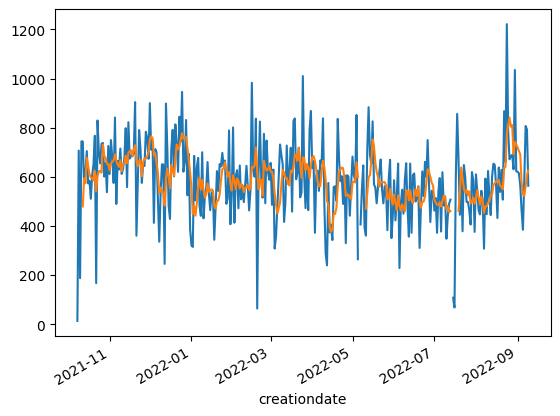

In [52]:
ax = dayMerged['ActiveEnergyBurned'].plot()
dayMerged['ActiveEnergyBurned'].rolling(5).mean().plot(ax= ax)
plt.show()